### Computational Guided Inquiry for PChem (Neshyba)

# Analytical $\mu$

### van der Waals and Berthelot's gases 
You probably remember this, but just as a reminder, a van der Waals gas is defined according to 

$$
P(T,V) = {{n R T} \over {V - nb}} - {{n^2 a} \over V^2}  \ \ \ \ (1)
$$

There are other ways of formulating a non-ideal gas, however! Here's Berthelot's formula:

$$
P(T,V) = {{n R T} \over {V - nb}} - {{n^2 a} \over TV^2}  \ \ \ \ (2)
$$ 

These two formulas look pretty similar, right? But extra $T$ in Berthelot's formula means Berthelot's $a$ and $b$ constants are not the same as van der Waals' $a$ and $b$. That won't matter for our purposes here, since we're focused on analytical properties of gases -- especially as they related to the slopes $\pi _T$ and $\mu _T$ that appear in differential equations of state for $dU$ and $dH$.

### Derivation of $\pi _T$
A useful formula for $\pi _T$, which is quite general$^*$, is 
$$
\pi _T = T\big ( \frac {\partial P}{\partial T} \big )_V - P \ \ \ \ (3)
$$

$^*$This comes from a set of equations known as *Maxwell's Equations* -- which we'll get to later.


### Derivation of $\mu _T$ for a van der Waals gas
Our formula for this (which also comes from *Maxwell's Equations*!) is 

$$
\mu _T = \frac {P + \pi_T}{(\partial P/\partial V)_T} + V \ \ \ \ (4)
$$

To simplify matters, we'll take the bilinear Taylor expansion of the first term. That is, if we say 

$$
\frac {P + \pi_T}{(\partial P/\partial V)_T}=F(a,b) \ \ \ \ (5)
$$

then

$$
\frac {P + \pi_T}{(\partial P/\partial V)_T} \approx F_{a,b=0} + a\big (\frac{\partial F}{\partial a}\big )|_{a,b=0}  + b\big (\frac{\partial F}{\partial b}\big )|_{a,b=0} \ \ \ \ (6)
$$

### Getting the intermolecular part of $H(T,P)$ from $\mu_T$ for a van der Waals gas
If we say that 

$$
U(T,V) = [{3 \over 2}RT + f_{rot}(T) + f_{vib}(T) + f_{intermol}(T,V)] \times n \ \ \ \ (7)
$$ 

then it's a pretty good approximation to say 

$$
H(T,P) = [{5 \over 2}RT + f_{rot}(T) + f_{vib}(T) + f'_{intermol}(T,P)] \times n \ \ \ \ (8)
$$

where 

$$
f'_{intermol}(T,P) = {1 \over n} \int^P \mu_T dP \ \ \ \ (9)
$$

(i.e., the indefinite integral of $\mu_T$). 


## Learning Goal
Gain familiarity with the use of Python's analytical tools (the Sympy package) to derive key relationships between $\pi _T$ and $\mu _T$ for a van der Waals gas and a Berthelot gas.

In [1]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
import sympy as sp
%matplotlib notebook

### Derivation of $\pi _T$ for a van der Waals gas
In the cell below, derive an analytical expression for $\pi _T$ for a van der Waals gas, using Sympy. The key relationships are Eqs. (1) and (3). Since the goal here is for you to get some practice at this kind of thing, here's a big tip: the answer you're looking for is $\pi_T=n^2a/V^2$. 

In [2]:
# pi_T for a vdw gas

### BEGIN SOLUTION
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("V")
sp.var("R")
sp.var("T")
sp.var("x")

P = n*R*T/(V-n*b) - a*n**2/V**2
dPdT = sp.diff(P,T)
pi_T = T*dPdT - P
sp.pprint(pi_T)
print(pi_T)
### END SOLUTION

   2
a⋅n 
────
  2 
 V  
a*n**2/V**2


### Derivation of $\mu _T$ for a van der Waals gas
In the cell below, derive an analytical expression for $\mu _T$ for a van der Waals gas. The key relationships are the relationship you just derived ($\pi_T=n^2a/V^2$), plus Eqs. (1), and (4)-(6).

Some hints: To find $\big (\frac{\partial F}{\partial a}\big )|_{a,b=0}$, first take the derivative of $F$ with respect to $a$, and *then* substitute zeros for $a$ and $b$. Similarly with $\big (\frac{\partial F}{\partial b}\big )|_{a,b=0}$. Sympy can help.

F =  R*T*n/((V - b*n)*(-R*T*n/(V - b*n)**2 + 2*a*n**2/V**3))
              R⋅T⋅n              
─────────────────────────────────
          ⎛                    2⎞
          ⎜    R⋅T⋅n      2⋅a⋅n ⎟
(V - b⋅n)⋅⎜- ────────── + ──────⎟
          ⎜           2      3  ⎟
          ⎝  (V - b⋅n)      V   ⎠
Exact result for mu_T =
              R⋅T⋅n                  
───────────────────────────────── + V
          ⎛                    2⎞    
          ⎜    R⋅T⋅n      2⋅a⋅n ⎟    
(V - b⋅n)⋅⎜- ────────── + ──────⎟    
          ⎜           2      3  ⎟    
          ⎝  (V - b⋅n)      V   ⎠    
F0= -V
Approximate result for mu_T =
      2⋅a⋅n
b⋅n - ─────
       R⋅T 
b*n - 2*a*n/(R*T)
24.436/((20 - b)*(a/4000 - 24.436/(20 - b)**2))


Text(0.5, 0, 'b')

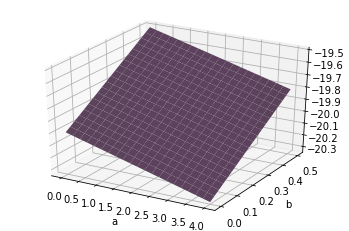

In [3]:
# mu_T for a vdw gas

### BEGIN SOLUTION
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("V")
sp.var("R")
sp.var("T")

P = n*R*T/(V-n*b) - a*n**2/V**2
pi_T = n**2*a/V**2
dPdV = sp.diff(P,V)
F = (P+pi_T)/dPdV
print("F = ", F)
sp.pprint(F)
mu_T_exact = F+V
print('Exact result for mu_T =')
sp.pprint(mu_T_exact)


F0 = F.subs({a:0,b:0}); print("F0=",F0)
Fa = sp.diff(F,a).subs({a:0,b:0})
Fb = sp.diff(F,b).subs({a:0,b:0})
mu_T = F0 + Fa*a + Fb*b + V
print('Approximate result for mu_T =')
sp.pprint(mu_T)
print(mu_T)

# This is not part of the solution, but motivation for the bilinear approach
import PchemLibrary as PL
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

agrid, bgrid = PL.Statespace([0,4,21],[0,.5,20])
Ftrial = R*T*n/((V - b*n)*(-R*T*n/(V - b*n)**2 + 2*a*n**2/V**3))
Ftrial = Ftrial.subs({n:1,P:1,V:20,R:.082,T:298}); print(Ftrial)
Fgrid = 24.436/((20 - bgrid)*(agrid/4000 - 24.436/(20 - bgrid)**2))

# Graph it -- if this looks like a plane, then a bilinear expansion would be justified
ax = PL.plot_surface(agrid, bgrid, Fgrid, color='plum') # Make the mesh plot
ax.set_xlabel("a")
ax.set_ylabel("b")

# So ... F0 = V, which cancels with the other V
# And the graph just made shows that a bilinear appoximation should be pretty accurate

### END SOLUTION

### Getting the intermolecular part of $H(T,P)$ from $\mu_T$ for a van der Waals gas
In the cell below, derive an expression for $f'_{intermol}(T,P)$, using Eqs. (8) & (9). You'll need an expression for $\mu_T$ to do this -- hopefully, you got something like $bn - 2an/(RT)$ in the previous problem. 

Some hints: you might find Sympy's simplify function useful in this. That is, after you've obtained an expression for $f'_{intermol}$, try this:

    fpintermol = sp.simplify(fpintermol)
    
and then print the result again.

In [4]:
# f' intermolecular for vdw
### BEGIN SOLUTION
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("R")
sp.var("T")
sp.var("P")

mu_T = b*n - 2*a*n/(R*T)

fpintermol = sp.integrate(mu_T,P)/n
fpintermol = sp.simplify(fpintermol)
sp.pprint(fpintermol)
### END SOLUTION

      2⋅P⋅a
P⋅b - ─────
       R⋅T 


### Berthelot's gas
Berthelot's definition of a real gas is given in Eq. (2). In the three cells below, use the methods you just employed for a van der Waals gas to find Berthelot's expressions for

- $\pi_T$
- $\mu_T$
- $f'_{intermol}(T,P)$

Assuming you're using Sympy for this, you might find useful the "simplify" functionality for each result.

In [5]:
# pi_T for a Berthelot gas
### BEGIN SOLUTION
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("V")
sp.var("R")
sp.var("T")
sp.var("x")

P = n*R*T/(V-n*b) - a*n**2/(V**2*T)
dPdT = sp.diff(P,T)
pi_T = T*dPdT - P
print('pi_T =')
print(pi_T)
pi_T = sp.simplify(pi_T)
print(pi_T)
sp.pprint(pi_T)

### END SOLUTION

pi_T =
-R*T*n/(V - b*n) + T*(R*n/(V - b*n) + a*n**2/(T**2*V**2)) + a*n**2/(T*V**2)
2*a*n**2/(T*V**2)
     2
2⋅a⋅n 
──────
    2 
 T⋅V  


In [6]:
# mu_T
### BEGIN SOLUTION


sp.var("a")
sp.var("b")
sp.var("n")
sp.var("V")
sp.var("R")
sp.var("T")
sp.var("x")

P = n*R*T/(V-n*b) - a*n**2/(V**2*T)
pi_T = 2*a*n**2/(T*V**2)
dPdV = sp.diff(P,V)
F = (P+pi_T)/dPdV
mu_T_exact = F+V
print('Exact result for mu_T =')
sp.pprint(mu_T_exact)


F0 = F.subs({a:0,b:0}); print("F0=",F0)
Fa = sp.diff(F,a).subs({a:0,b:0}); print("Fa=",Fa)
Fb = sp.diff(F,b).subs({a:0,b:0}); print("Fb=",Fb)
mu_T = F0 + Fa*a + Fb*b + V
print('mu_T =')
sp.pprint(mu_T)
print(mu_T)
### END SOLUTION

Exact result for mu_T =
                     2   
         R⋅T⋅n    a⋅n    
        ─────── + ────   
        V - b⋅n      2   
                  T⋅V    
V + ─────────────────────
                        2
        R⋅T⋅n      2⋅a⋅n 
    - ────────── + ──────
               2       3 
      (V - b⋅n)     T⋅V  
F0= -V
Fa= -3*n/(R*T**2)
Fb= n
mu_T =
      3⋅a⋅n
b⋅n - ─────
          2
       R⋅T 
b*n - 3*a*n/(R*T**2)


In [7]:
# f'_intermol
### BEGIN SOLUTION
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("R")
sp.var("T")
sp.var("P")

mu_T = b*n - 3*a*n/(R*T**2)

fpintermol = sp.integrate(mu_T,P)/n
fpintermol = sp.simplify(fpintermol)
print("f' intermol =")
sp.pprint(fpintermol)
### END SOLUTION

f' intermol =
      3⋅P⋅a
P⋅b - ─────
          2
       R⋅T 
